In [1]:
#!pip install tqdm

In [30]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from keras.models import load_model

In [3]:
# from google.colab import drive 
# import zipfile as zf

In [4]:
# drive.mount('/gdrive') # 구글드라이브 연결 

In [5]:
# files = zf.ZipFile("/gdrive/My Drive/Colab Notebooks/data_multi.zip",'r') # 압축 파일의 자료 읽기
# files.extractall()
# files.close()

In [6]:
data = pd.read_csv('multi_data_test (2).csv', encoding='cp949')
data.shape

(9742, 8)

In [7]:
data.head()

,image,can,glass,pack,paper,pet,plastic,vinyl
0,3403540.jpg,0,0,1,0,0,0,0
1,3403580.jpg,0,0,1,0,0,0,0
2,3403658.jpg,1,0,0,0,0,0,0
3,3403788.jpg,0,1,0,0,0,0,0
4,3403841.jpg,0,0,0,1,0,0,0


In [8]:
img_width = 200
img_height = 150

X = []

for i in tqdm(range(data.shape[0])):
    path = 'multi_images/' + data['image'][i]
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)
     

100%|█████████████████████████████████████████████████████████████████████████████| 9742/9742 [00:50<00:00, 192.31it/s]


In [9]:
y = data.drop(['image'], axis = 1)
y = y.to_numpy()
y.shape

(9742, 7)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)
X_train[0].shape

(200, 150, 3)

In [11]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(200,150, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

num_classes = 7

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 1024)              12583936  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 27,305,799
Trainable params: 19,670,535
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, 
                         shear_range=0.15,horizontal_flip=True, fill_mode="nearest")


In [14]:
EPOCHS= 16
BS = 16

history = model.fit_generator(aug.flow(X_train, y_train, batch_size=BS),validation_data=(X_test, y_test), 
                    steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

Epoch 1/16


C:\Users\디자이너\AppData\Local\Temp\ipykernel_23172\3910494626.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=BS),validation_data=(X_test, y_test),


517/517 [==============================] - 437s 844ms/step - loss: 0.3889 - accuracy: 0.4368 - val_loss: 0.3446 - val_accuracy: 0.4856
Epoch 2/16
517/517 [==============================] - 445s 861ms/step - loss: 0.3536 - accuracy: 0.4989 - val_loss: 0.3412 - val_accuracy: 0.5007
Epoch 3/16
517/517 [==============================] - 445s 860ms/step - loss: 0.3402 - accuracy: 0.5194 - val_loss: 0.3269 - val_accuracy: 0.5383
Epoch 4/16
517/517 [==============================] - 447s 865ms/step - loss: 0.3297 - accuracy: 0.5379 - val_loss: 0.3522 - val_accuracy: 0.5315
Epoch 5/16
517/517 [==============================] - 447s 864ms/step - loss: 0.3225 - accuracy: 0.5542 - val_loss: 0.3383 - val_accuracy: 0.5547
Epoch 6/16
517/517 [==============================] - 445s 861ms/step - loss: 0.3167 - accuracy: 0.5661 - val_loss: 0.3494 - val_accuracy: 0.5321
Epoch 7/16
517/517 [==============================] - 448s 867ms/step - loss: 0.3096 - accuracy: 0.5765 - val_loss: 0.3276 - val_accura

In [15]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

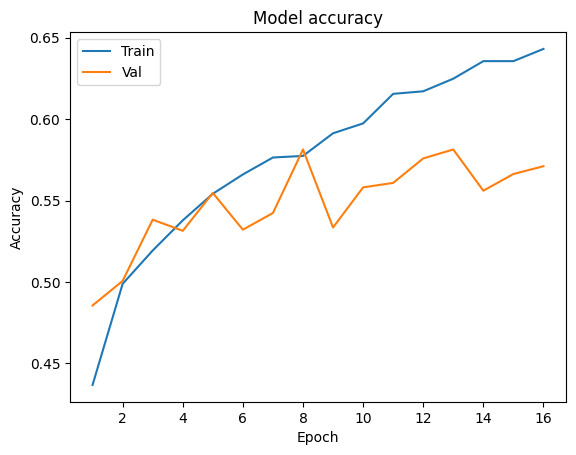

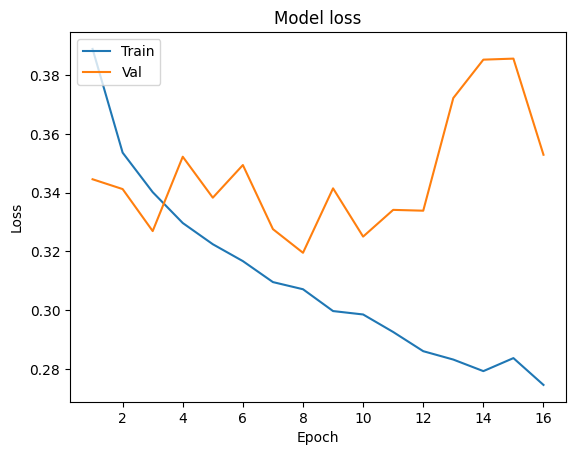

In [16]:
plot_learningCurve(history, BS)

1/1 [==============================] - 0s 148ms/step
can 일 확률 0.7725712
vinyl 일 확률 0.4639023
pack 일 확률 0.17747684


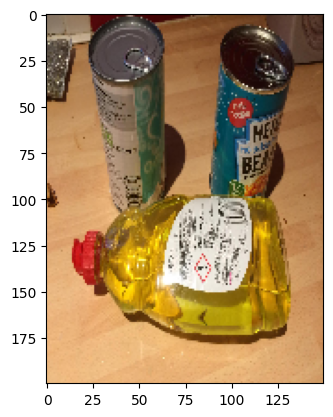

In [17]:
img = image.load_img('000047.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = ['can', 'glass', 'pack', 'paper', 'pet', 'plastic', 'vinyl']

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1] # 역순(퍼센트 높은 순으로 3개만 정렬)

for i in range(3):  
    print(classes[top3[i]],'일 확률',  y_prob[0][top3[i]])

In [39]:
model.save('Model_4d.h5')

1/1 [==============================] - 0s 116ms/step
paper 일 확률 0.9423323
vinyl 일 확률 0.08633214
can 일 확률 0.084254324


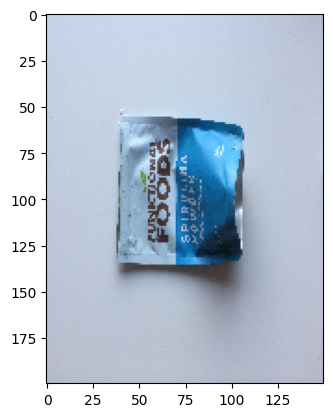

In [47]:
img = image.load_img('5065.JPG', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = ['can', 'glass', 'pack', 'paper', 'pet', 'plastic', 'vinyl']

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1] # 역순(퍼센트 높은 순으로 3개만 정렬)

for i in range(3):  
    print(classes[top3[i]],'일 확률',  y_prob[0][top3[i]])

In [48]:
def find_genre(test_path, model_path):
    model = load_model(model_path) 
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    top_3 = np.argsort(prob[0])[:-4:-1]

    classes = ['can', 'glass', 'pack', 'paper', 'pet', 'plastic', 'vinyl']

    for i in range(3):
        print( classes[top_3[i]],'일 확률 : ', prob[0][top_3[i]] )
    plt.imshow(img)

In [ ]:
find_genre("./data/3706844.jpg",'./data/Model_4d.h5')